# INFS 768
## Assignment 3
#### NNET Models with MLPClassifier
##### Kevin Kuipers
##### 11/19/2019

# Part 1. Explore NNET Models with MLP Classifier

### Section 1

##### This will part of the jupyter notebook will work with the MLP by applying MLPClassifier to the two_moons dataset. First I will begin by loading the various libraries and datasets required for this notebook. 

In [1]:
#Importing the libraries and data sets
from graphviz import *
import sklearn
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import matplotlib.pyplot as plt
import mglearn


from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


C:\Users\Agent000\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Agent000\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Applying Different hidden layers and nodes

##### Now lets looks applying the MLPClassifier and try different number of hidden layers and the number of nodes in each layer 

Text(0, 0.5, 'Feature 1')

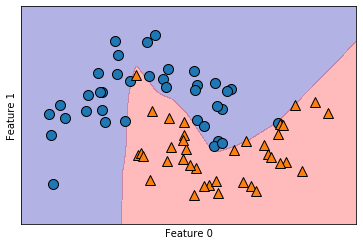

In [2]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

##### It looks like the model created a nonlinear decision boundary and appears to do a good job separating the two classes. By default the MLP uses 100 hidden nodes. This maybe a bit much for a small data set like this. Lets trying different sizes for nodes and hidden layers

Text(0, 0.5, 'Feature 1')

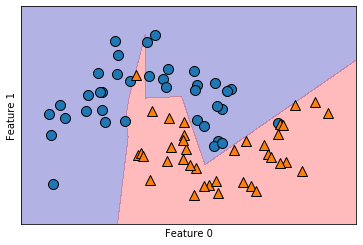

In [3]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

##### It appears that reducing the number of hidden units displays less of a smooth decision boundary. It tends to make it more choppy. Now lets try fitting a model with two hidden layers and 10 nodes

Text(0, 0.5, 'Variable 2')

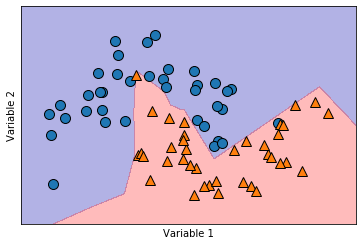

In [4]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")

##### It appears that it is the decision boundary less choppy with 10 nodes and 2 hidden layers, compared to 1 hidden layer and 1 nodes. Now lets do the exact same thing but try changing or adding activiation in model known as 'tanh'

Text(0, 0.5, 'Feature 1')

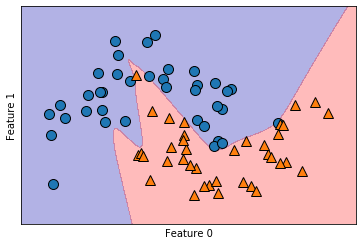

In [5]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Applying different alpha values

##### It appears changing the activation to 'tanh' the decision boundary became less jagged.Now lets ake some adjustments trying to shrink the weights toward to zero. Lets try with two hidden layers with 10 nodes but various alpha values (0.0001, 0.01, .1, and 1). Then lets try two hidden layers with 100 nodes and see what occurs using he same alpha figures. 

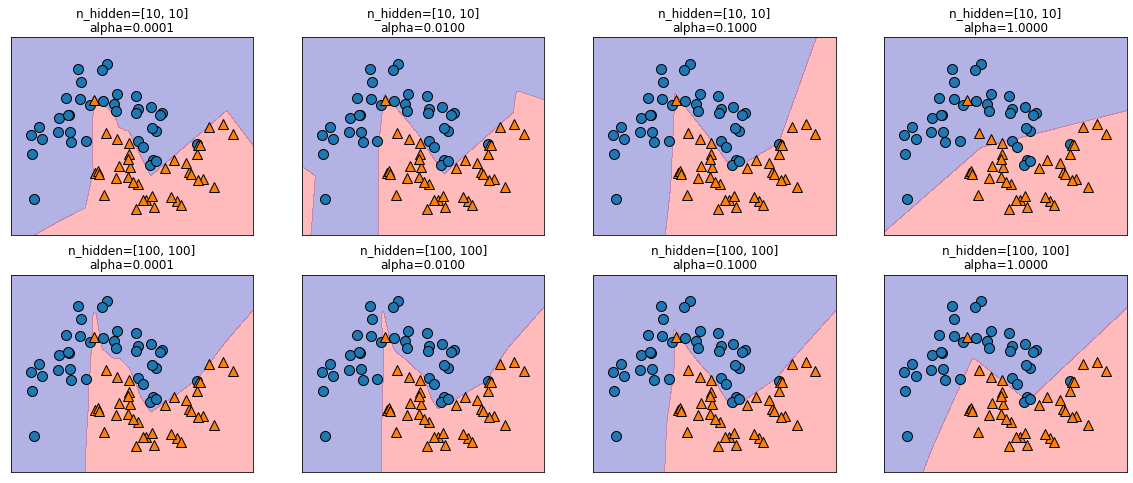

In [6]:
fig, axes = plt.subplots(2,4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                           hidden_layer_sizes=[n_hidden_nodes, 
                                              n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
        n_hidden_nodes, n_hidden_nodes, alpha))

##### Now lets use the same code as above but add the activator 'tanh'

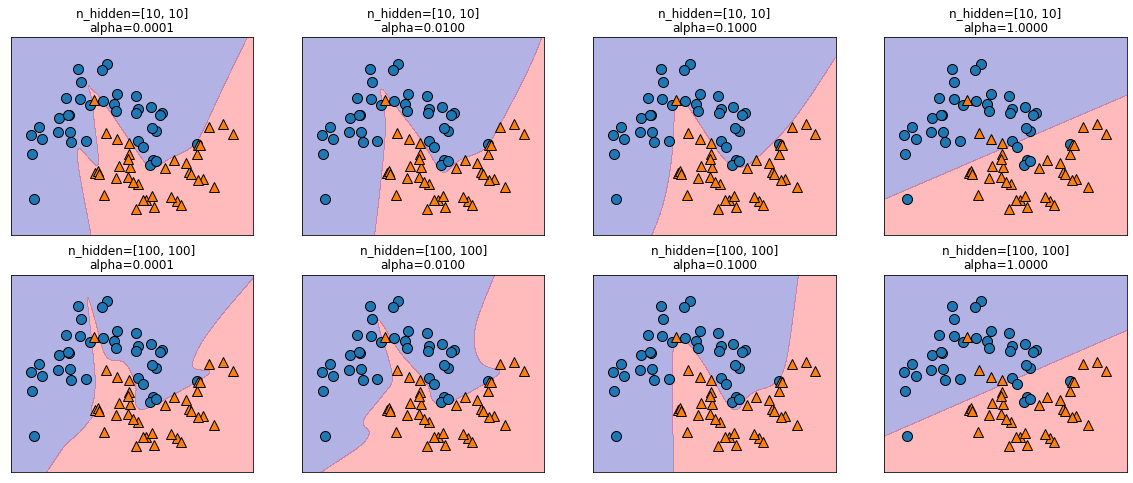

In [7]:
fig, axes = plt.subplots(2,4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0,
                           hidden_layer_sizes=[n_hidden_nodes, 
                                              n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
        n_hidden_nodes, n_hidden_nodes, alpha))

##### It seems like there is a "sweet spot" for the alpha value. Too small and it seems like over fitting can occur and too large can seems lik#e under fitting occurs. Even with with the number of nodes and the number of hidden layers. The data we are currenty working with is a rather small dataset. Only two features and not that many observations. Therefore, the less complex the model the better. So in this case it may be better to have a larger alpha and less hidden layers and less nodes.


##### Lets experiment and fit one model with 5 hidden layers and 100 nodes each.

Text(0, 0.5, 'Feature 1')

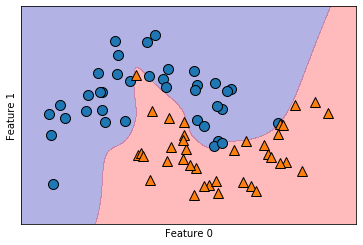

In [8]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[100,100,100,100,100])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Changing Weights

##### Something to keep in mind when using neural network models is that their weights are randomly set before the learning begins. Due this random initialization affects the models are learned differently. Lets look at several of the same neural network models with different weights

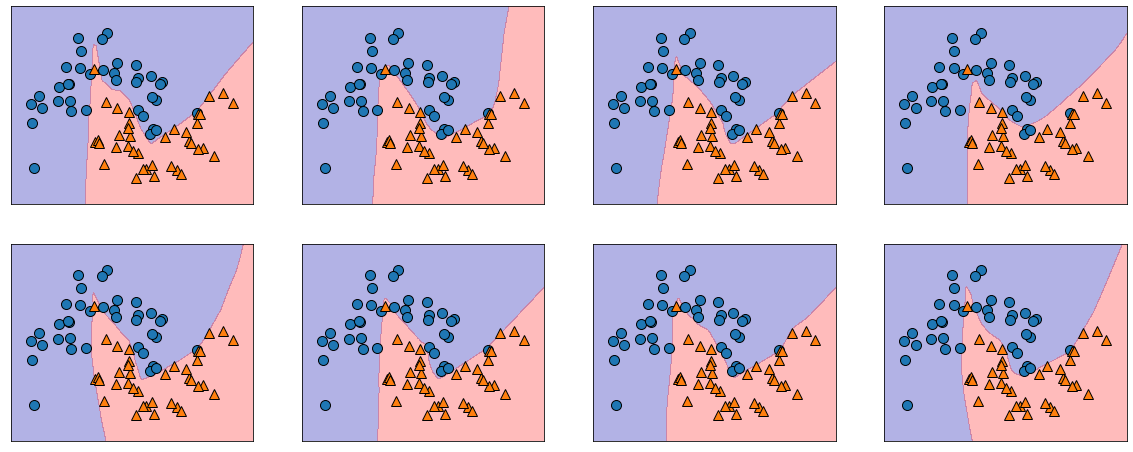

In [9]:
fig, axes = plt.subplots(2,4, figsize=(20,8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                       hidden_layer_sizes=[100,100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)

# Breast Cancer Dataset

##### Now lets look on real-world data. Lets turn our attention to the breast cancer data set and apply MLPClassifier to it 

In [10]:
#Loading the dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [11]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=0)

#Fitting the model
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

#Outputting the training and test accuracy of the moodel
print("Accuracy on the training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on the training set: 0.94
Accuracy on test set: 0.92


##### The accuracy of the model is in the low 90% range. That is not bad. However, neural network models and SVMs tend to work better scaling the data. In fact, neural network models and SVMs expect their input features to vary in a similar way. This means they have a mean of 0, and variance of 1. Lets trying scaling the breast cancer data set using the StandardScalar method

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#calling fit and transform in sequence (using method chaining)
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled  = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=42)
mlp.fit(x_train_scaled, y_train)

print("Accuracy on the training set: {:.2f}".format(mlp.score(x_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(x_test_scaled, y_test)))

Accuracy on the training set: 0.99
Accuracy on test set: 0.96


C:\Users\Agent000\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


##### After scaling the data using the StandardScaler method, the accuracy on both the training and est impoved. The training test is almost a 100% accurate. However, a message was output during this model processing phase: "ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet." This means we should increase the number of iterations. Lets give it a try

In [13]:
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(x_train_scaled, y_train)

print("Accuracy on the training set: {:.2f}".format(mlp.score(x_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(x_test_scaled, y_test)))

Accuracy on the training set: 1.00
Accuracy on test set: 0.96


##### This has increased the accuracy on the training set and removed the warning message. There is roughly a 4%-5% gap in the accuracy between the test set and training set. Lets see if we cal close that gap but changing the alpha parameter.  Lets see if we can do some model tuning on the alpha parameter.

In [14]:
for axx, n_hidden_nodes in zip(axes, [10,100, 500]):
    for ax, alpha in zip(axx, [0.000000001, 0.000001, 0.0001, 0.01, 0.1, 1, 2, 5, 10]):
        mlp = MLPClassifier(solver='lbfgs', random_state=42,
                           hidden_layer_sizes=[n_hidden_nodes, 
                                              n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(x_train_scaled, y_train)
        print("Accuracy on the training set: {:.4f}".format(mlp.score(x_train_scaled, y_train)))
        print("Accuracy on test set: {:.4f}".format(mlp.score(x_test_scaled, y_test)))
        


Accuracy on the training set: 1.0000
Accuracy on test set: 0.9650
Accuracy on the training set: 1.0000
Accuracy on test set: 0.9650
Accuracy on the training set: 1.0000
Accuracy on test set: 0.9650
Accuracy on the training set: 1.0000
Accuracy on test set: 0.9510
Accuracy on the training set: 1.0000
Accuracy on test set: 0.9580
Accuracy on the training set: 1.0000
Accuracy on test set: 0.9580
Accuracy on the training set: 1.0000
Accuracy on test set: 0.9580
Accuracy on the training set: 1.0000
Accuracy on test set: 0.9580


##### It appears that the smaller the alpha the greater the test accuracy becomes. It seems like alpha <0.0001 will be an optimal value for alpha